<a href="https://colab.research.google.com/github/indrochoco/Playstore-app-Review-analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path ='/content/drive/MyDrive/almabetter/capstone project/Copy of Play Store Data.csv'
df = pd.read_csv(path)

In [6]:
path_1='/content/drive/MyDrive/almabetter/capstone project/Copy of User Reviews.csv'
df_1 = pd.read_csv(path_1)

In [ ]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
df_1.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


# **Rating column data type is String format here, so we need to check the rating and convert it to FLoat data type for better analysis**

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [ ]:
df.describe()

In [ ]:
df_1.info()

In [ ]:
df_1.describe()

In [ ]:
df.shape

(10841, 13)

In [ ]:
df_1.shape

(64295, 5)

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.Category.unique()
#Basically there should not be "1.9" in the catergory 

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

# **Let's clean the data first** -- Data cleaining

In [8]:
df[df.Category =='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
df.loc[10472] = df.loc[10472].shift()


In [10]:
df.App.loc[10472]= df.Category.loc[10472]


In [11]:
df.Category.loc[10472]= np.nan

In [ ]:
df.loc[10472]

**So,  lets take a look of Genres**

In [ ]:
df.Genres.unique()


**Look like genres are pretty much okay**

In [ ]:
type(df.Rating[0])

***Now Price, Rating and review column's data type should be changed, for better analysis***

In [13]:
df.Rating = df.Rating.astype('float')

In [14]:
df.Reviews = df.Reviews.astype('int')

In [106]:
df.Price = df.Price.str.replace('$','')
df.Price= df.Price.astype('float')

In [ ]:
df.info()

## **Installs column should be modified properly , as per ease of analysis**
Data Organizing

In [15]:
df.Installs = df.Installs.str.replace('+','')

In [16]:
df.Installs = df.Installs.str.replace(',','')

In [17]:
df.Installs = df.Installs.astype('int')

In [ ]:
# MAX installs rows are
df[df.Installs==df.Installs.max()].tail()

##*Now Searching the most installed app's Category*

In [19]:
max_installs= df[df.Installs==df.Installs.max()]




**Okay!!!!**
*These categories are the popular among users*

In [24]:
max_installs.Category.unique()

array(['BOOKS_AND_REFERENCE', 'COMMUNICATION', 'ENTERTAINMENT', 'GAME',
       'SOCIAL', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'TOOLS',
       'PRODUCTIVITY', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'FAMILY'],
      dtype=object)

In [21]:
max_installs_good_rating= max_installs.groupby('Category')['Rating'].mean().sort_values(ascending=False)

In [22]:
max_installs_good_rating

Category
PHOTOGRAPHY            4.500000
GAME                   4.500000
TOOLS                  4.400000
PRODUCTIVITY           4.400000
SOCIAL                 4.325000
FAMILY                 4.300000
ENTERTAINMENT          4.300000
TRAVEL_AND_LOCAL       4.260000
COMMUNICATION          4.173684
VIDEO_PLAYERS          4.100000
NEWS_AND_MAGAZINES     3.900000
BOOKS_AND_REFERENCE    3.900000
Name: Rating, dtype: float64

## Adding some visualization Between category vs Rating.
these graph shows that, how rating varies with category , although all these apps are maximun installed.

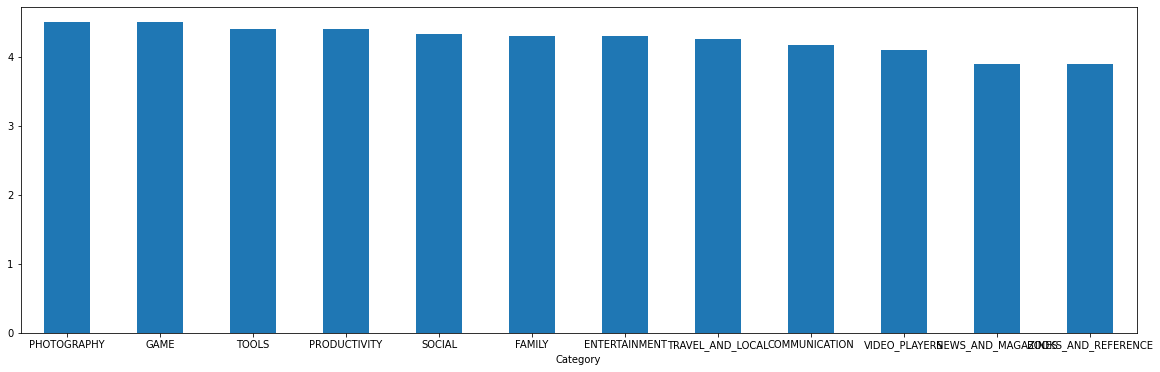

In [23]:
plt.rcParams['figure.figsize'] = (20, 6)
ax = max_installs_good_rating.plot.bar( rot=0)

## By observing both graph , most installed and good rating geners or categories are Photography and Arcade/Game. Tools and Productivity are followed behind. 

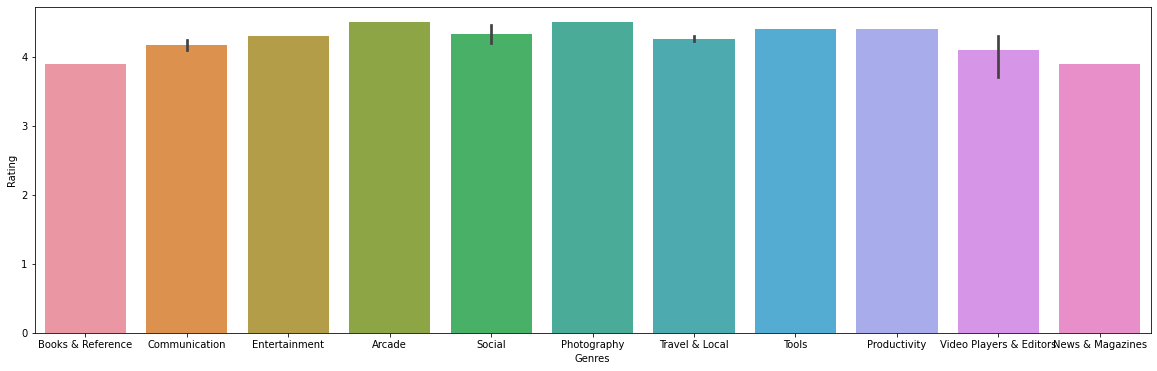

In [25]:

ax = sns.barplot(x="Genres", y="Rating", data=max_installs)

### It was observed that some app size is 0, so it was assumed that those were the per-installed application, and some apps size are varries with devices. We exclude 0 and 'varries with devices' from max install dataframe, so that , we can get proper idea of how size play important role in installations.

In [56]:
max_install_size= max_installs[(max_installs.Size != 0) & (max_installs.Size != 'Varies with device')]

In [ ]:
max_install_size

## Analysing Top 10 categories are the most installed by user.

In [106]:
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [127]:
df_non_null= df[~df.Genres.isna()]

In [128]:
df_non_null.shape

(10840, 13)

In [32]:
avg_install= df_non_null.groupby('Category')['Installs'].mean().sort_values(ascending=False).reset_index()

In [33]:
avg_install[:10]

,Category,Installs
0,COMMUNICATION,8.435989e+07
1,SOCIAL,4.769447e+07
2,VIDEO_PLAYERS,3.555430e+07
3,PRODUCTIVITY,3.343418e+07
4,GAME,3.066960e+07
5,PHOTOGRAPHY,3.011417e+07
6,TRAVEL_AND_LOCAL,2.662359e+07
7,NEWS_AND_MAGAZINES,2.648876e+07
8,ENTERTAINMENT,1.925611e+07
9,TOOLS,1.358573e+07


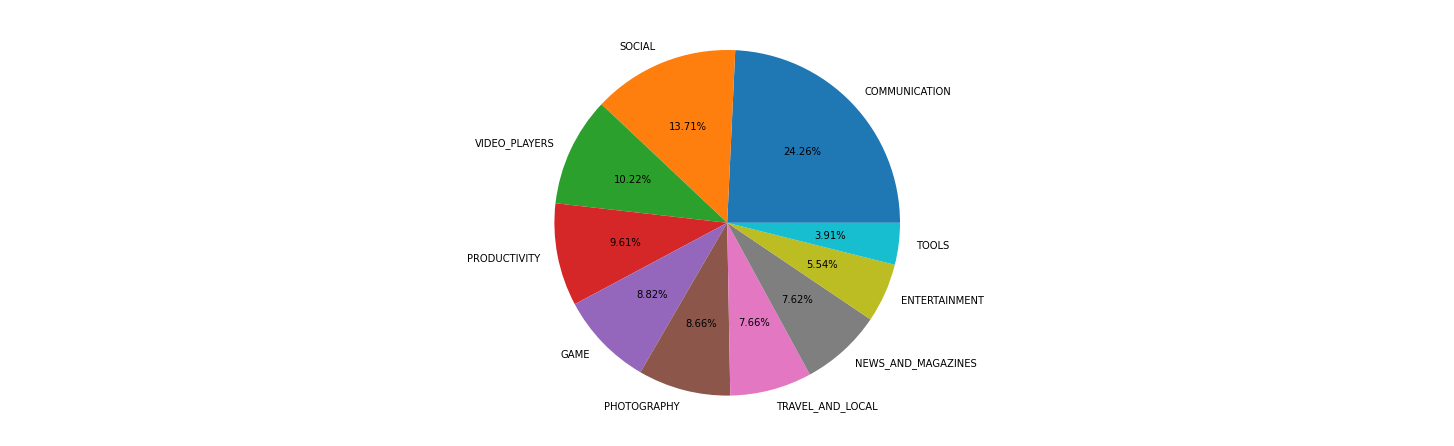

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(avg_install[:10].Installs,labels = avg_install[:10].Category,autopct='%1.2f%%')
plt.show()

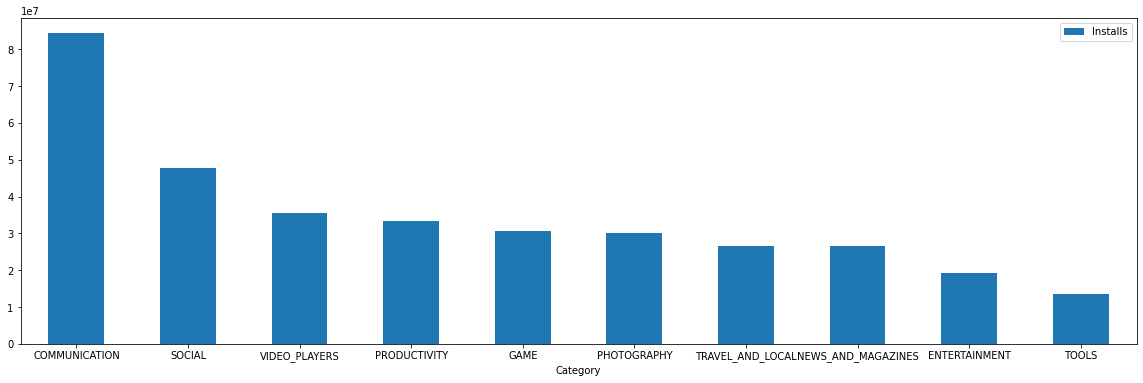

In [35]:
#alternative Graph
ax= avg_install[:10].plot.bar(x='Category',y='Installs',rot= 0)

Analysis the content Rating , as per category and individually

In [98]:
content_rating_df = df.groupby(['Category','Content Rating'])['Content Rating'].count().unstack()

In [99]:
content_rating_df

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
ART_AND_DESIGN,NaN,61.0,1.0,NaN,3.0,NaN
AUTO_AND_VEHICLES,NaN,83.0,1.0,NaN,1.0,NaN
BEAUTY,NaN,45.0,2.0,3.0,3.0,NaN
BOOKS_AND_REFERENCE,NaN,202.0,5.0,3.0,21.0,NaN
BUSINESS,NaN,445.0,1.0,1.0,13.0,NaN
COMICS,2.0,26.0,3.0,7.0,22.0,NaN
COMMUNICATION,NaN,345.0,NaN,10.0,32.0,NaN
DATING,NaN,21.0,NaN,201.0,12.0,NaN
EDUCATION,NaN,144.0,8.0,3.0,1.0,NaN


In [ ]:
sns.set(rc={'figure.figsize':(25,8.27)})
sns.lineplot(data=content_rating_df)

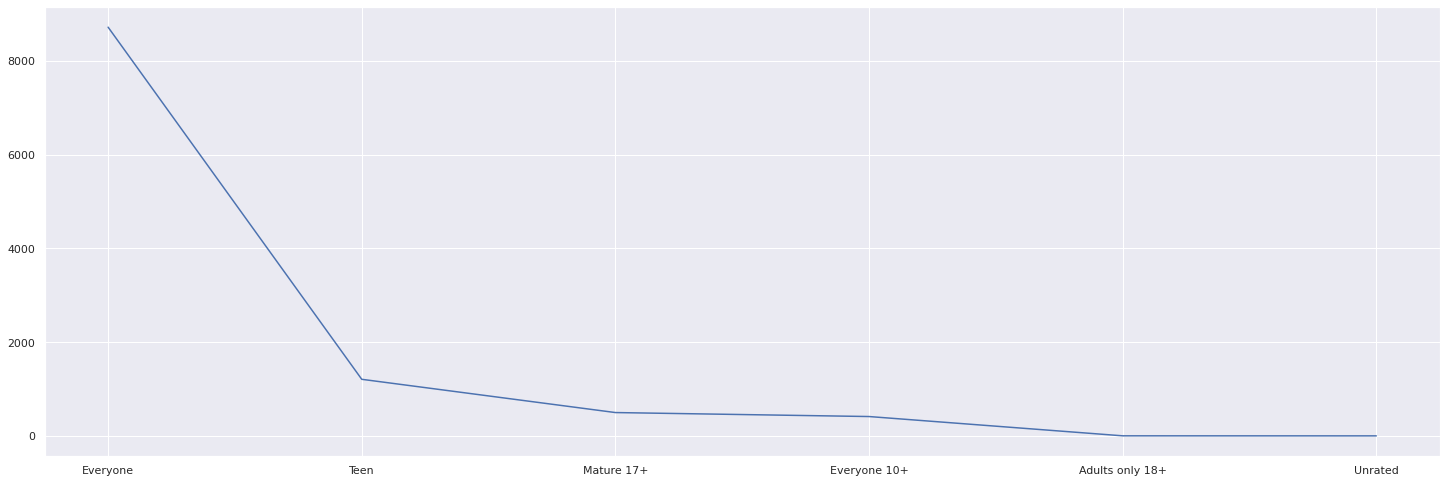

In [103]:
#individually Content rating counting
df["Content Rating"].value_counts().plot()

## Comparing between the Free and paid apps

In [104]:
df[(~df.Type.isna()) & (~df.Rating.isna()) & (~df.Reviews.isna())& (~df.Installs.isna())].groupby('Type').agg({'Rating':'mean','Reviews':'mean','Installs':'mean'})

,Rating,Reviews,Installs
Type,,,
Free,4.185940,551061.099541,1.921497e+07
Paid,4.266615,14432.766615,1.127397e+05


In [28]:
# converting to date format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [ ]:
df['Last Updated']

## Converting app size to bytes

In [108]:
def convert_bytes(i):
  if i.count('M')==1:
    return float(i[:-1])*1024*1024
  elif i.count('K')==1:
    return float(i[:-1])*1024
  else:
    return 0
    

In [110]:
df['Size']=df.Size.apply(convert_bytes)

In [111]:
df.Size

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           0.0
10840    19922944.0
Name: Size, Length: 10841, dtype: float64

# Finding the correlation between data

In [112]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068147,0.046210,0.051393,-0.021851
Reviews,0.068147,1.000000,0.065523,0.643123,-0.009666
Size,0.046210,0.065523,1.000000,-0.003339,-0.013533
Installs,0.051393,0.643123,-0.003339,1.000000,-0.011688
Price,-0.021851,-0.009666,-0.013533,-0.011688,1.000000


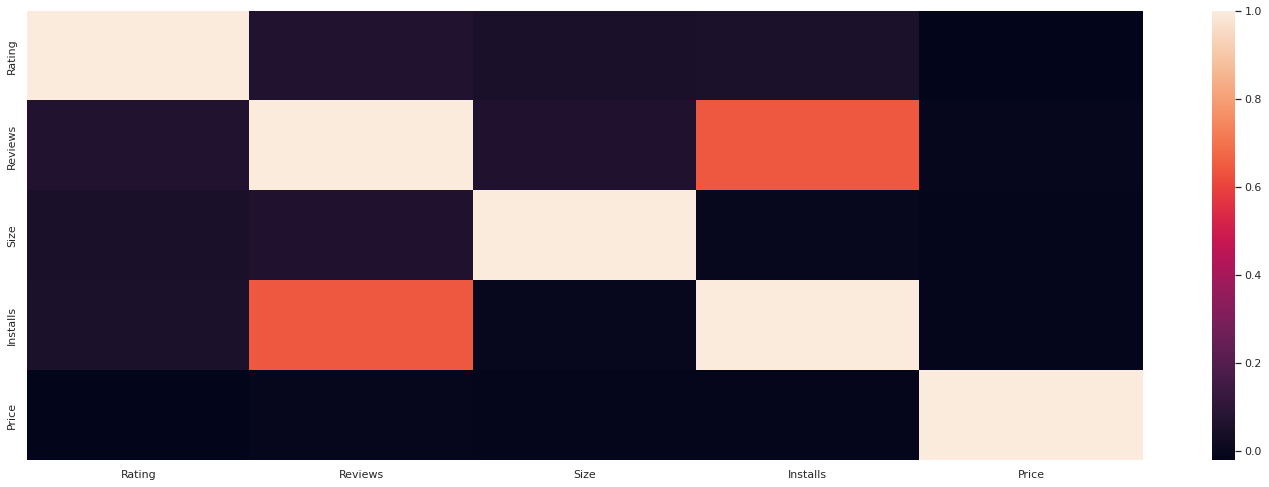

In [113]:
sns.heatmap(df.corr())


### *   Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.
### *   Polarity, also known as orientation is he emotion expressed in the sentence. It can be positive, neagtive or neutral.
### *   Subjectivity is when text is an explanatory article which must be analysed in context




In [38]:
df_1.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


In [39]:
df_2= df_1[~df_1.Sentiment_Polarity.isna()]

In [40]:
df_2.shape

(37432, 5)

## Most reviewed App are:

In [41]:
 df_2.App.value_counts()[0:10]

Bowmasters                        312
Angry Birds Classic               273
Helix Jump                        273
Calorie Counter - MyFitnessPal    255
Candy Crush Saga                  240
Duolingo: Learn Languages Free    240
Garena Free Fire                  222
8 Ball Pool                       219
Calorie Counter - Macros          200
10 Best Foods for You             194
Name: App, dtype: int64

In [42]:
review_count= df_2.groupby('App')['App'].count().sort_values(ascending=False)

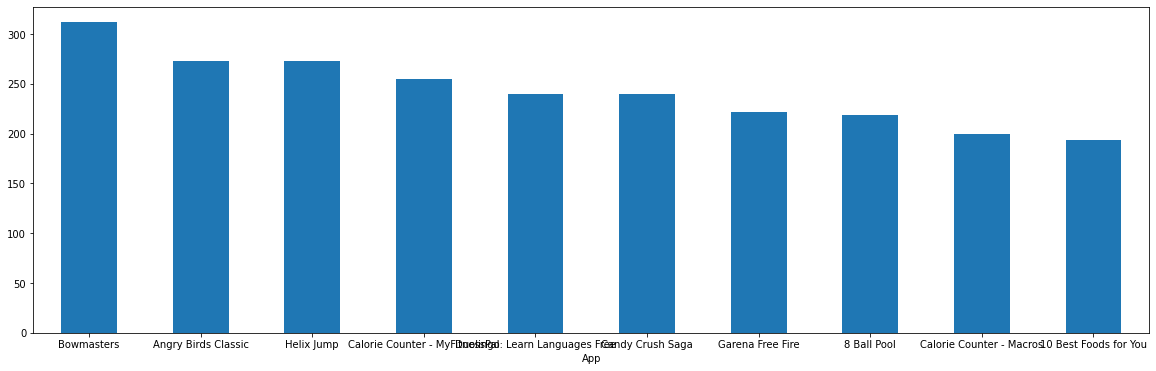

In [43]:
review_count[:10].plot.bar(rot=0)

Let's take a look of Most 8 reviewed App's Sentiment_Polarity and 	Sentiment_Subjectivity

In [44]:
df_3= df_2[(df_2.App=='Bowmasters') | (df_2.App=='Helix Jump') | (df_2.App=='Angry Birds Classic') | (df_2.App=='Calorie Counter - MyFitnessPal') | (df_2.App=='Duolingo: Learn Languages Free') | (df_2.App=='Candy Crush Saga') | (df_2.App=='Garena Free Fire') | (df_2.App=='8 Ball Pool')]

In [45]:
# Most reviewed app total sentiment
sentiment= df_3.groupby('App').agg({'Sentiment_Polarity':'sum'}).sort_values(by='Sentiment_Polarity',ascending=False).reset_index()

In [70]:
sentiment

,App,Sentiment_Polarity
0,Calorie Counter - MyFitnessPal,54.996746
1,Duolingo: Learn Languages Free,48.097857
2,Helix Jump,27.208676
3,Bowmasters,19.161620
4,Garena Free Fire,15.797047
5,Candy Crush Saga,7.456288
6,8 Ball Pool,0.274190
7,Angry Birds Classic,-2.057709


Text(0.5, 1.0, 'Most reviewed app total sentiment')

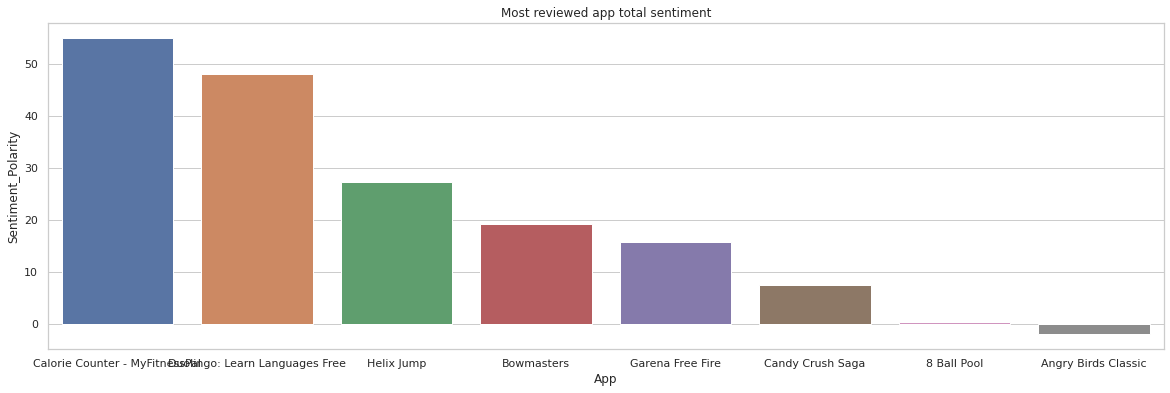

In [47]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="App", y="Sentiment_Polarity", data=sentiment)
ax.set_title('Most reviewed app total sentiment')

Let's Visualise the Sentiment_Polarity and 	Sentiment_Subjectivity of top reviwed app

In [157]:
color_dict = dict({'Bowmasters':'brown',
                  'Helix Jump':'green',
                  'Angry Birds Classic': 'orange',
                  'Calorie Counter - MyFitnessPal': 'red',
                   'Duolingo: Learn Languages Free': 'dodgerblue',
                   'Candy Crush Saga':'yellow',
                   'Garena Free Fire':'chocolate',
                   '8 Ball Pool':'limegreen'})

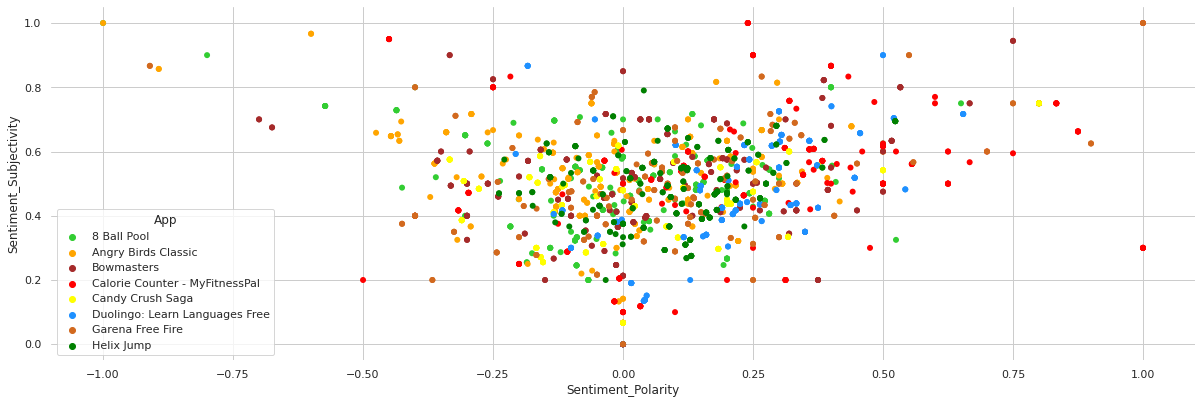

In [158]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(20.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Sentiment_Polarity", y="Sentiment_Subjectivity",
                sizes=(1, 8), linewidth=0, hue='App',
                data=df_3, ax=ax,palette=color_dict,legend='full')


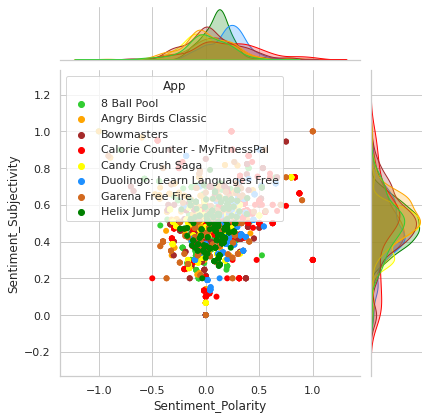

In [94]:
# Jointplot
sns.despine(f, left=True, bottom=True)
g= sns.jointplot(x="Sentiment_Polarity", y="Sentiment_Subjectivity",
                sizes=(1, 8), linewidth=0, hue='App',
                data=df_3, ax=ax,palette=color_dict,legend='full')


In [41]:
df_2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [130]:
df_nonnull= df[(~df.Rating.isna()) & (~df.Reviews.isna())]

In [76]:
user_review =df_2.groupby('App').agg({'Sentiment_Polarity':'sum','Sentiment_Subjectivity':'mean'})

In [147]:
merged_df = pd.merge(df_nonnull, user_review, how='inner',left_on='App',right_on='App') 

In [148]:
merged_df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.716667,0.641540
1,Coloring book moana,FAMILY,3.9,974,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.716667,0.641540
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,34603008.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,24.163460,0.523447
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,40894464.0,5000000,Free,0.0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,1.650595,0.679226


In [149]:
merged_df.describe()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
count,1228.000000,1.228000e+03,1.228000e+03,1.228000e+03,1228.000000,1228.000000,1228.000000
mean,4.298697,1.322120e+06,1.983619e+07,4.649488e+07,0.093526,9.288623,0.493101
std,0.300689,4.937886e+06,2.591088e+07,1.500214e+08,1.146008,10.619997,0.079056
min,2.600000,4.600000e+01,0.000000e+00,1.000000e+03,0.000000,-9.726559,0.000000
25%,4.200000,1.263275e+04,0.000000e+00,1.000000e+06,0.000000,2.225000,0.458285
50%,4.300000,6.619400e+04,8.912896e+06,5.000000e+06,0.000000,7.001728,0.498327
75%,4.500000,5.063545e+05,2.831155e+07,1.000000e+07,0.000000,12.888005,0.534886
max,4.900000,7.815831e+07,1.038090e+08,1.000000e+09,29.990000,91.322167,0.916667


In [157]:
# keeping the rows which are above the mean of sentiment polarity, installs, reviews and which apps rating greater than 4 .
mean_df= merged_df[(merged_IJ_df.Installs == 5.000000e+06) & (merged_IJ_df.Reviews>	6.619400e+04) & (merged_IJ_df.Sentiment_Polarity>7.001728) &(merged_IJ_df.Rating>4)]

In [158]:
mean_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
32,AlReader -any text book reader,BOOKS_AND_REFERENCE,4.6,90468,6186598.4,5000000,Free,0.0,Everyone,Books & Reference,"May 27, 2018",1.911805270,2.3 and up,9.576496,0.412577
34,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,38797312.0,5000000,Free,0.0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up,13.358767,0.581568
35,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,38797312.0,5000000,Free,0.0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up,13.358767,0.581568


In [166]:
mean_df.groupby(['App','Category']).agg({'Rating':'mean','Size':'mean','Installs':'mean','Reviews':'mean','Sentiment_Polarity':'mean','Sentiment_Subjectivity':'mean'}).sort_values(by='Reviews',ascending=False)

,,Rating,Size,Installs,Reviews,Sentiment_Polarity,Sentiment_Subjectivity
App,Category,,,,,,
DRAGON BALL LEGENDS,GAME,4.6,50331648.0,5000000,338080.000000,16.624740,0.519107
G Cloud Backup,PRODUCTIVITY,4.6,0.0,5000000,267115.500000,8.241567,0.573890
Goal Live Scores,SPORTS,4.4,36700160.0,5000000,232423.000000,7.077162,0.513837
"Hide Something - Photo, Video",SOCIAL,4.6,5557452.8,5000000,225103.000000,7.221307,0.512799
"Fabulous: Motivate Me! Meditate, Relax, Sleep",HEALTH_AND_FITNESS,4.6,32505856.0,5000000,205299.000000,7.679838,0.526581
Diary with lock password,LIFESTYLE,4.3,10171187.2,5000000,179139.000000,15.197876,0.509656
Free Dating App & Flirt Chat - Match with Singles,DATING,4.4,3250585.6,5000000,172460.000000,11.210000,0.583653
Grubhub: Food Delivery,FOOD_AND_DRINK,4.5,36700160.0,5000000,155944.000000,9.328189,0.470029
CALCU™ Stylish Calculator Free,TOOLS,4.7,11534336.0,5000000,152692.000000,13.398730,0.453467
